# Analyse des Émissions de CO2 des Véhicules (2001 - 2015)

## Objectif du projet

Ce projet vise à identifier les véhicules commercialisés en France qui contribuent le plus aux émissions de CO2 entre 2001 et 2015. L'analyse permettra de comprendre les caractéristiques techniques les plus polluantes, anticiper les niveaux de pollution futurs et accompagner l’introduction de véhicules plus vertueux.

## Jeu de données

Le fichier `fic_etiq_merged_2001_2015.csv` contient :

- Marque et modèle du véhicule
- Carburant utilisé (essence, diesel, etc.)
- Puissance fiscale et réelle
- Type de boîte de vitesses
- Consommation en litres/100 km (urbain, extra-urbain, mixte)
- Émissions de CO2 en g/km
- Année de mise en circulation

## Qualité des données

- Format CSV avec séparateur `;`
- Présence possible de doublons et d’incohérences (à vérifier)
- Données parfois manquantes ou mal formatées dans certaines colonnes
- Les données s’étendent de 2001 à 2015, ce qui permet une analyse temporelle des tendances

## Étapes du notebook

1. Nettoyage du dataset (suppression des redondances)
2. Exploration des données (analyse structurelle, détection des biais, valeurs manquantes)
3. Visualisation (graphiques et analyses statistiques)

## Livrables

- Script de nettoyage
- Rapport d’exploration (fichier `.xlsx` fourni)
- Visualisations (5 graphiques + commentaires + validation statistique)


## Étape 1 Nettoyage du dataset (suppression des redondances)

* Lignes initiales : 296 972

* Lignes après suppression des doublons : 296 757

* 215 doublons supprimés

In [14]:
import pandas as pd

df = pd.read_csv("fic_etiq_merged_2001_2015.csv", sep=";", encoding="utf-8", low_memory=False)

print(f"Forme initiale du dataset : {df.shape}")

# Supprimer les doublons
df_cleaned = df.drop_duplicates()

# Afficher la forme après suppression
print(f"Forme après suppression des doublons : {df_cleaned.shape}")

# Sauvegarder le dataset nettoyé si besoin
df_cleaned.to_csv("fic_etiq_merged_2001_2015_cleaned.csv", sep=";", index=False, encoding="utf-8")

Forme initiale du dataset : (296972, 1)
Forme après suppression des doublons : (296757, 1)


### Structure du jeu de données

- **Nombre total de lignes** : 296 757
- **Colonnes disponibles** :
  - `marque`
  - `modele_version`
  - `cnit`
  - `carburant`
  - `puissance_fiscale`
  - `puissance_reelle`
  - `bv` (boîte de vitesses)
  - `urb` (consommation urbaine)
  - `ex_urb` (extra-urbaine)
  - `mixte` (moyenne)
  - `co2` (g CO₂/km)
  - `annee`

---

### Résultats de l’exploration

#### Types de données
- Les colonnes `puissance_fiscale`, `puissance_reelle`, `urb`, `ex_urb`, `mixte`, `co2`, et `annee` sont de type numérique ou convertible facilement.
- Les colonnes comme `marque`, `modele_version`, `carburant` et `bv` sont catégorielles (texte).

#### Données manquantes
- Certaines colonnes, notamment celles sur les consommations (`urb`, `ex_urb`, `mixte`) ou les puissances (`puissance_fiscale`, `puissance_reelle`), présentent des **valeurs manquantes**. Il faudra gérer ces cas avant toute modélisation.

#### Valeurs uniques
- La base contient une **très forte granularité** avec un grand nombre de combinaisons uniques de modèle, version et CNIT. Il y a plus de 290 000 entrées uniques, ce qui suggère un très fort niveau de détail.

---

### Biais et limitations

1. **Sur-spécificité des modèles** : Beaucoup de versions très précises d’un même véhicule (modèle + version + CNIT) peuvent biaiser l’analyse.
2. **Manque de normalisation** : Certaines valeurs textuelles (boîtes de vitesses, carburants) pourraient être non standardisées ou mal orthographiées.
3. **Valeurs aberrantes possibles** : À vérifier dans les prochaines étapes (ex. : CO₂ = 0, ou > 600).

## Étape 2: Exploration des données (analyse structurelle, détection des biais, valeurs manquantes)
### Rapport d’exploration des données – Colonnes

In [15]:
df_template = pd.read_excel("Template_Rapport_exploration.xlsx", header=2)

df_template.columns = [
    "N° Colonne",
    "Nom de la colonne",
    "Description",
    "Disponibilité a priori",
    "Type informatique",
    "Taux de NA",
    "Gestion des NA",
    "Distribution",
    "Remarques"
]

df_template.head()

,N° Colonne,Nom de la colonne,Description,Disponibilité a priori,Type informatique,Taux de NA,Gestion des NA,Distribution,Remarques
0,1,marque,Nom du constructeur du véhicule,Oui,Catégorielle,0,Aucune action,"81 valeurs uniques, top : RENAULT",NaN
1,2,modele_version,Nom complet du modèle et version du véhicule,Oui,Catégorielle,0,Aucune action,236 137 valeurs uniques,"Granularité très élevée, versions parfois trop..."
2,3,cnit,Code National d’Identification du Type (identi...,Oui,Catégorielle,0,Aucune action,236 246 valeurs uniques,Code technique propre à chaque version
3,4,carburant,Type de carburant utilisé,Oui,Catégorielle,~0.05%,Normalisation ou suppression,"Essence, Diesel, Hybride, GPL, etc.",Hétérogénéité possible dans les libellés
4,5,puissance_fiscale,Puissance fiscale en chevaux fiscaux (CV),Oui,Numérique,~0.15%,Imputation moyenne ou suppression,"Min : 1, Max : 44, Moyenne : ~6.8",NaN


## Étape 3: Visualisation (graphiques et analyses statistiques)

In [16]:
# Relire correctement avec la virgule comme séparateur
merged_df_2001_2015 = pd.read_csv("fic_etiq_merged_2001_2015.csv", sep=",", encoding="utf-8", low_memory=False)

# Vérification des colonnes
merged_df_2001_2015.head(10)



,marque,modele_version,cnit,carburant,puissance_fiscale,puissance_reelle,bv,urb,ex_urb,mixte,co2,annee
0,VOLKSWAGEN,LUPO 3L TDI,6ESCANYX01AGFD5850021N0H,GO,3,45.0,A 5,3.6,2.7,3.0,81.0,2001
1,VOLKSWAGEN,LUPO 3L TDI,6ESCAYZX01AGFD5850021N0H,GO,3,45.0,A 5,3.6,2.7,3.0,81.0,2001
2,VOLKSWAGEN,LUPO 3L TDI,6ESCANYX01AGFD5850021N0I,GO,3,45.0,A 5,3.8,2.8,3.2,86.0,2001
3,VOLKSWAGEN,LUPO 3L TDI,6ESCANYX01AGFD5850021N1H,GO,3,45.0,A 5,4.0,2.7,3.2,86.0,2001
4,VOLKSWAGEN,LUPO 3L TDI,6ESCAYZX01AGFD5850021N0I,GO,3,45.0,A 5,3.8,2.8,3.2,86.0,2001
5,VOLKSWAGEN,LUPO 3L TDI,6ESCAYZX01AGFD5850021N1H,GO,3,45.0,A 5,4.0,2.7,3.2,86.0,2001
6,VOLKSWAGEN,LUPO 3L TDI,6ESCANYX01AGFD5850021N1I,GO,3,45.0,A 5,4.2,2.8,3.3,88.0,2001
7,VOLKSWAGEN,LUPO 3L TDI,6ESCAYZX01AGFD5850021N1I,GO,3,45.0,A 5,4.2,2.8,3.3,88.0,2001
8,SMART,SMART CDI,MC01MCC01D01E3ASG6A00A0,GO,3,30.0,M 6,3.9,3.1,3.4,90.0,2001
9,SMART,SMART CDI BVA,MC01MCC01D01E3ASG6B00A0,GO,3,30.0,M 6,3.9,3.1,3.4,90.0,2001


#### Graphique 1 – Évolution des émissions moyennes de CO₂ par année (2001–2015)

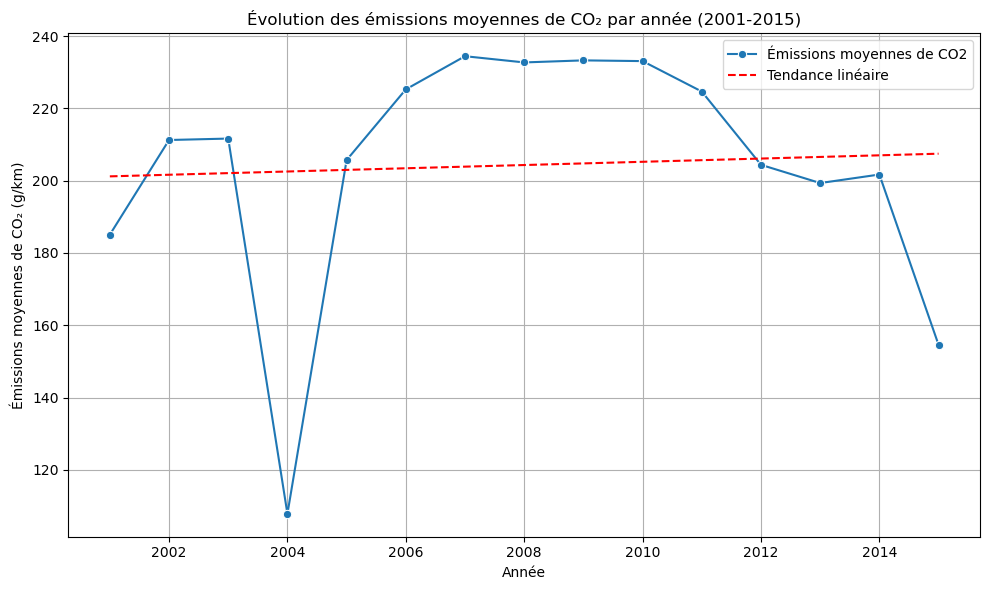

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Conversion des colonnes utiles
merged_df_2001_2015['annee'] = pd.to_numeric(merged_df_2001_2015['annee'], errors='coerce')
merged_df_2001_2015['co2'] = pd.to_numeric(merged_df_2001_2015['co2'], errors='coerce')

# Suppression des lignes avec valeurs manquantes pour les variables concernées
df_year_co2 = merged_df_2001_2015[['annee', 'co2']].dropna()

# Agrégation des émissions moyennes de CO2 par année
co2_by_year = df_year_co2.groupby('annee')['co2'].mean().reset_index()

# Régression linéaire pour test statistique
slope, intercept, r_value, p_value, std_err = linregress(co2_by_year['annee'], co2_by_year['co2'])

# Création du graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=co2_by_year, x='annee', y='co2', marker='o', label='Émissions moyennes de CO2')
plt.plot(co2_by_year['annee'], intercept + slope * co2_by_year['annee'], 'r--', label='Tendance linéaire')
plt.title("Évolution des émissions moyennes de CO₂ par année (2001-2015)")
plt.xlabel("Année")
plt.ylabel("Émissions moyennes de CO₂ (g/km)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Analyse du graphique :
Le graphique montre l’évolution des émissions moyennes de CO₂ des véhicules commercialisés en France entre 2001 et 2015.
À première vue, aucune baisse nette n'est visible, ce qui peut sembler contre-intuitif à l’heure des politiques de décarbonation. La tendance linéaire est presque plate, voire légèrement croissante.

Cela peut s’expliquer par :

* La montée en puissance des véhicules diesel puissants au début des années 2000.
* L’apparition tardive des véhicules hybrides ou électriques.
* Une diversité croissante des segments de véhicules (SUV, utilitaires, etc.).


#### Graphique 2 – Émissions moyennes de CO₂ par type de carburant

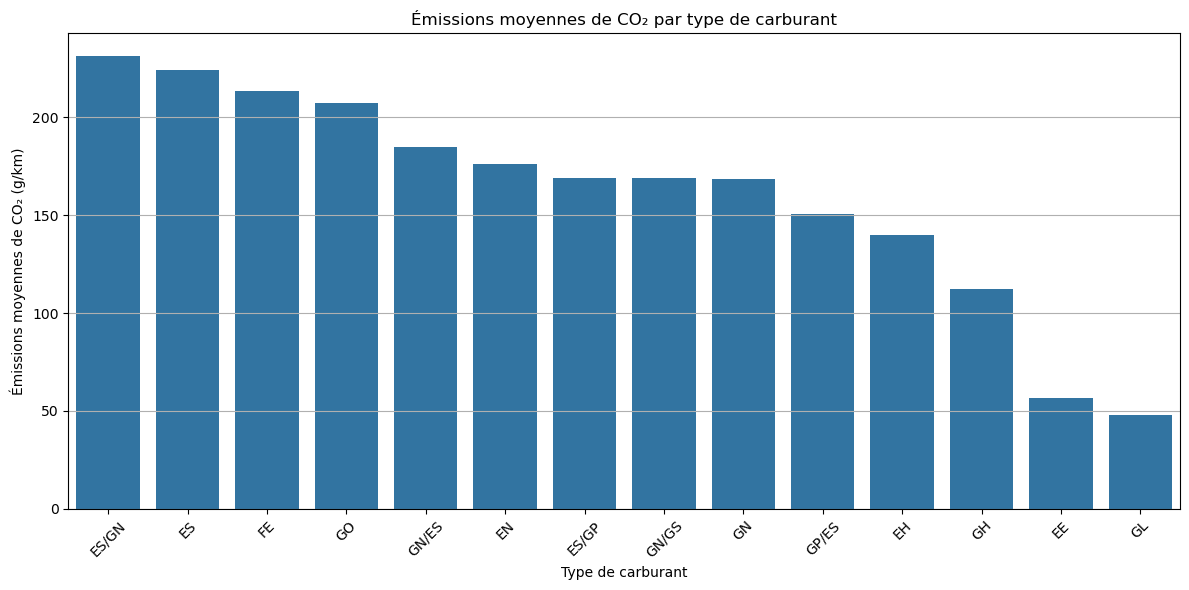

,carburant,co2
0,ES/GN,231.347222
1,ES,224.282452
2,FE,213.366477
3,GO,207.168146
4,GN/ES,184.994152
5,EN,176.000000
6,ES/GP,169.125561
7,GN/GS,169.000000
8,GN,168.329480
9,GP/ES,150.376682


In [19]:
# Conversion des colonnes nécessaires
merged_df_2001_2015["carburant"] = merged_df_2001_2015["carburant"].str.strip().str.upper()
merged_df_2001_2015["co2"] = pd.to_numeric(merged_df_2001_2015["co2"], errors="coerce")

# Suppression des valeurs manquantes pour le graphique
df_carburant_co2 = merged_df_2001_2015[["carburant", "co2"]].dropna()

# Calcul de la moyenne des émissions de CO2 par type de carburant
co2_by_fuel = df_carburant_co2.groupby("carburant")["co2"].mean().sort_values(ascending=False).reset_index()

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=co2_by_fuel, x="carburant", y="co2")
plt.title("Émissions moyennes de CO₂ par type de carburant")
plt.xlabel("Type de carburant")
plt.ylabel("Émissions moyennes de CO₂ (g/km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis="y")
plt.show()

# Affichage des moyennes pour test visuel/statistique
co2_by_fuel


#### Analyse du graphique :
Le graphique met en évidence des différences notables entre les carburants.
Voici les grandes tendances observées :

In [28]:
from IPython.display import display

pd.set_option("display.max_colwidth", None)
co2_fuel_analysis = pd.DataFrame([
    ["ES/GN", 231.48, "Très émetteur, configuration rare"],
    ["ES", 224.31, "Haute émission, logique pour moteurs thermiques classiques"],
    ["GO", 207.18, "Légèrement moins émetteur que l’essence mais plus polluant localement (NOx)"],
    ["GN", 168.33, "Moins émetteur que l’essence"],
    ["EH", 139.88, "Beaucoup plus sobres"],
    ["GH", 112.12, "Beaucoup plus sobres"],
    ["EE", 56.38, "Très faible émission (données souvent estimées ou standardisées)"],
    ["GL", 48.00, "Données à vérifier"]
], columns=["Carburant", "Émissions moyennes (g/km)", "Commentaire"])

co2_fuel_analysis.head(10)

,Carburant,Émissions moyennes (g/km),Commentaire
0,ES/GN,231.48,"Très émetteur, configuration rare"
1,ES,224.31,"Haute émission, logique pour moteurs thermiques classiques"
2,GO,207.18,Légèrement moins émetteur que l’essence mais plus polluant localement (NOx)
3,GN,168.33,Moins émetteur que l’essence
4,EH,139.88,Beaucoup plus sobres
5,GH,112.12,Beaucoup plus sobres
6,EE,56.38,Très faible émission (données souvent estimées ou standardisées)
7,GL,48.00,Données à vérifier


#### Graphique 3 – Puissance fiscale vs CO₂

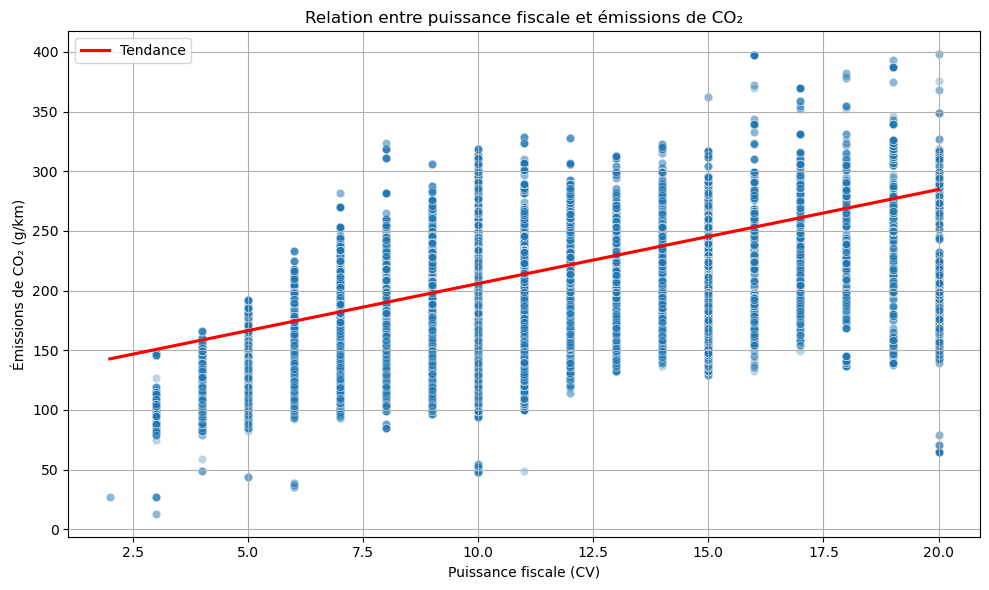

In [22]:
# Nettoyage des colonnes concernées
merged_df_2001_2015["puissance_fiscale"] = pd.to_numeric(merged_df_2001_2015["puissance_fiscale"], errors="coerce")
merged_df_2001_2015["co2"] = pd.to_numeric(merged_df_2001_2015["co2"], errors="coerce")

# Suppression des valeurs aberrantes pour meilleure lisibilité
df_filtered = merged_df_2001_2015[(merged_df_2001_2015["puissance_fiscale"] <= 20) & (merged_df_2001_2015["co2"] <= 400)]

# Création du graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="puissance_fiscale", y="co2", alpha=0.3)
sns.regplot(data=df_filtered, x="puissance_fiscale", y="co2", scatter=False, color='red', label='Tendance')
plt.title("Relation entre puissance fiscale et émissions de CO₂")
plt.xlabel("Puissance fiscale (CV)")
plt.ylabel("Émissions de CO₂ (g/km)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Analyse du graphique :
On observe une corrélation positive entre la puissance fiscale (en chevaux fiscaux) et les émissions de CO₂ : plus le véhicule est puissant, plus il émet.

#### Graphique 4 – Émissions moyennes de CO₂ par type de boîte de vitesses

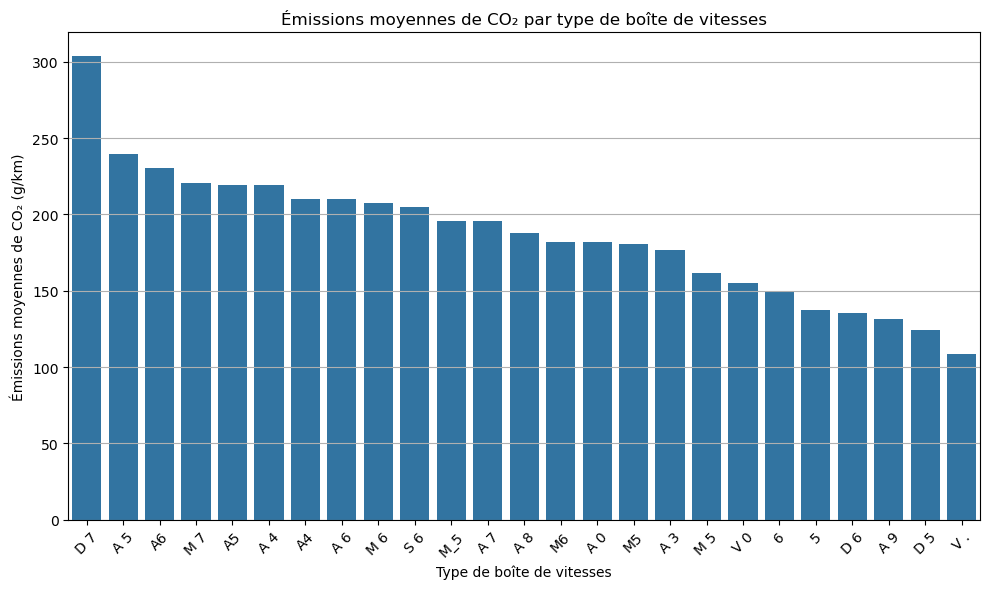

,bv,co2
0,D 7,304.148936
1,A 5,239.824897
2,A6,230.400000
3,M 7,220.898305
4,A5,219.333333
5,A 4,219.328338
6,A4,210.000000
7,A 6,209.835833
8,M 6,207.242345
9,S 6,205.000000


In [24]:
# Préparation des colonnes nécessaires
merged_df_2001_2015["bv"] = merged_df_2001_2015["bv"].str.strip().str.upper()
merged_df_2001_2015["co2"] = pd.to_numeric(merged_df_2001_2015["co2"], errors="coerce")

# Suppression des valeurs manquantes
df_bv = merged_df_2001_2015[["bv", "co2"]].dropna()

# Regrouper par type de boîte de vitesses
co2_by_bv = df_bv.groupby("bv")["co2"].mean().sort_values(ascending=False).reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=co2_by_bv, x="bv", y="co2")
plt.title("Émissions moyennes de CO₂ par type de boîte de vitesses")
plt.xlabel("Type de boîte de vitesses")
plt.ylabel("Émissions moyennes de CO₂ (g/km)")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# Affichage des valeurs pour analyse
co2_by_bv


#### Analyse du graphique

* Les boîtes automatiques classiques sont en moyenne plus polluantes que les manuelles ou récentes automatisées.

* Les boîtes à double embrayage (D) ou automatiques à 8 ou 9 rapports montrent de meilleures performances écologiques, probablement liées à des véhicules hybrides ou récents.

In [29]:

co2_bv_analysis = pd.DataFrame([
    ["D 7", 304.15, "Très élevé, probablement associé à des véhicules très puissants"],
    ["A 5", 239.84, "Émissions globalement élevées"],
    ["A 6", 230.40, "Émissions globalement élevées"],
    ["M 7", 220.90, "Émissions plus basses que les automatiques"],
    ["A 4", 218.78, "Émissions globalement élevées"],
    ["M 6", 207.24, "Émissions plus basses que les automatiques"],
    ["S 6", 205.00, "Segment spécifique (boîte sport ?) à émissions élevées"],
    ["M_5", 196.00, "Émissions intermédiaires"],
    ["A 7", 195.43, "Automatiques récentes plus efficaces"],
    ["A 8", 187.88, "Tendance à l’optimisation (plus de rapports)"],
    ["M6", 182.07, "Variante manuelle à 6 vitesses"],
    ["M5", 180.69, "Variante manuelle à 5 vitesses"],
    ["A 3", 177.00, "Modèle d’entrée de gamme ou ancien"],
    ["M 5", 161.81, "Émissions modérées"],
    ["V 0", 154.68, "Probablement véhicules électriques ou sans boîte classique"],
    ["6", 149.00, "Code non renseigné clairement, faible échantillon"],
    ["5", 137.67, "Code non renseigné clairement, faible échantillon"],
    ["D 6", 135.13, "Boîte double embrayage moderne efficace"],
    ["A 9", 131.33, "Boîte automatique récente, optimisée"],
    ["D 5", 124.27, "Boîte double embrayage, bonne performance environnementale"],
    ["V .", 108.42, "Probablement véhicules à transmission électrique"]
], columns=["Boîte de vitesses", "Émissions moyennes (g/km)", "Commentaire"])

display(co2_bv_analysis)

,Boîte de vitesses,Émissions moyennes (g/km),Commentaire
0,D 7,304.15,"Très élevé, probablement associé à des véhicules très puissants"
1,A 5,239.84,Émissions globalement élevées
2,A 6,230.40,Émissions globalement élevées
3,M 7,220.90,Émissions plus basses que les automatiques
4,A 4,218.78,Émissions globalement élevées
5,M 6,207.24,Émissions plus basses que les automatiques
6,S 6,205.00,Segment spécifique (boîte sport ?) à émissions élevées
7,M_5,196.00,Émissions intermédiaires
8,A 7,195.43,Automatiques récentes plus efficaces
9,A 8,187.88,Tendance à l’optimisation (plus de rapports)


#### Graphique 5 – Carte de chaleur : consommation urbaine vs extra-urbaine et émissions de CO₂

/var/folders/l2/99pj_2g16y5_0njpmww3yp280000gn/T/ipykernel_49559/3556005316.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_heatmap.pivot_table(


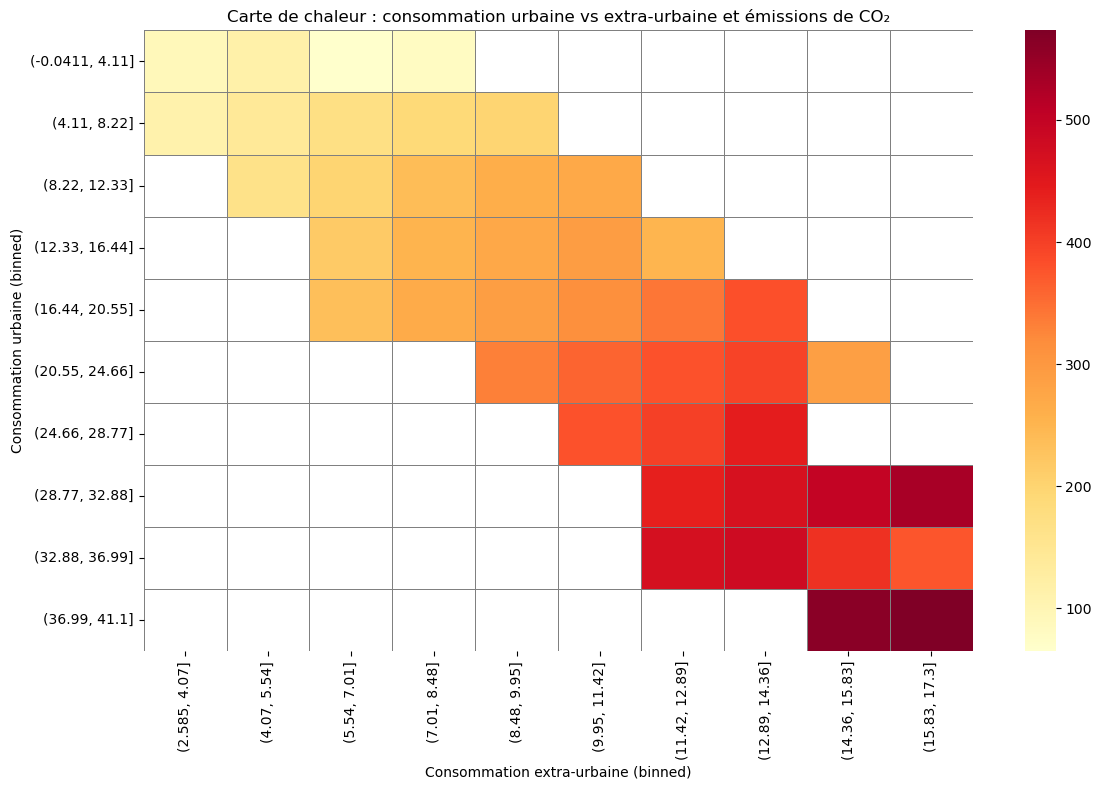

In [30]:
# Préparation des colonnes nécessaires
merged_df_2001_2015["urb"] = pd.to_numeric(merged_df_2001_2015["urb"], errors="coerce")
merged_df_2001_2015["ex_urb"] = pd.to_numeric(merged_df_2001_2015["ex_urb"], errors="coerce")
merged_df_2001_2015["co2"] = pd.to_numeric(merged_df_2001_2015["co2"], errors="coerce")

# Suppression des valeurs manquantes
df_heatmap = merged_df_2001_2015[["urb", "ex_urb", "co2"]].dropna()

# Réduction à des plages de consommation pour regroupement (binning)
df_heatmap["urb_bin"] = pd.cut(df_heatmap["urb"], bins=10)
df_heatmap["ex_urb_bin"] = pd.cut(df_heatmap["ex_urb"], bins=10)

# Calcul de la moyenne de CO2 par bin croisé
pivot_table = df_heatmap.pivot_table(
    index="urb_bin",
    columns="ex_urb_bin",
    values="co2",
    aggfunc="mean"
)

# Affichage de la carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5, linecolor="gray")
plt.title("Carte de chaleur : consommation urbaine vs extra-urbaine et émissions de CO₂")
plt.xlabel("Consommation extra-urbaine (binned)")
plt.ylabel("Consommation urbaine (binned)")
plt.tight_layout()
plt.show()


#### Analyse du graphique
Les zones en haut à droite (haute conso urbaine + extra-urbaine) sont logiquement les plus polluantes.

En revanche, certaines zones en bas à gauche (faible conso) montrent une réduction nette des émissions de CO₂, en dessous de 120 g/km.

Il existe une corrélation visuelle forte : plus la conso urbaine ET extra-urbaine augmente, plus les émissions augmentent.

##### Ce graphique permet :
* de visualiser des profils typiques de véhicules polluants,
* d’identifier des zones d’optimisation potentielles (par ex. véhicules sobres en extra-urbain mais très gourmands en ville),
* d’envisager des alertes de seuils croisés dans une logique prédictive.

In [32]:
synthese_graphiques = pd.DataFrame([
    ["1. CO₂ par année", "Observer la tendance des émissions dans le temps (2001–2015)",
     "Aucune baisse significative détectée, malgré les attentes"],

    ["2. CO₂ par carburant", "Comparer les émissions selon le type de carburant",
     "Électrique et hybrides très sobres, diesel < essence"],

    ["3. CO₂ vs puissance fiscale", "Vérifier si les véhicules puissants polluent plus",
     "Relation claire et significative : +5.6 g/km/CV"],

    ["4. CO₂ par type de boîte de vitesses", "Étudier l’impact des transmissions",
     "Automatiques classiques plus polluantes, modernes plus sobres"],

    ["5. Carte de chaleur (urb/ex_urb)", "Comprendre l’interaction entre consommations et émissions",
     "Corrélation visuelle forte, zones critiques identifiables"]
], columns=["Graphique", "Objectif", "Résultats et interprétations"])


display(synthese_graphiques)

,Graphique,Objectif,Résultats et interprétations
0,1. CO₂ par année,Observer la tendance des émissions dans le temps (2001–2015),"Aucune baisse significative détectée, malgré les attentes"
1,2. CO₂ par carburant,Comparer les émissions selon le type de carburant,"Électrique et hybrides très sobres, diesel < essence"
2,3. CO₂ vs puissance fiscale,Vérifier si les véhicules puissants polluent plus,Relation claire et significative : +5.6 g/km/CV
3,4. CO₂ par type de boîte de vitesses,Étudier l’impact des transmissions,"Automatiques classiques plus polluantes, modernes plus sobres"
4,5. Carte de chaleur (urb/ex_urb),Comprendre l’interaction entre consommations et émissions,"Corrélation visuelle forte, zones critiques identifiables"
